# A tutorial introduction into deep learning with Keras and Tensorflow.  We will use the MNIST dataset which is the 'Hello world' problem of deep learning

I always like to start my jupternotebooks with this code because it fits the display window to my screen.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### This tutrial was adapted from Deep Learning with Python Chapter 2 Chollet, F. (2017). Deep Learning with Python (1st ed.). Greenwich, CT, USA: Manning Publications Co.

Start with some definitions.
Numerical data in an array are called tensors.  https://en.wikipedia.org/wiki/Tensor.

Scalars are 0 dimensional tensors (a single digit). 

In [2]:
import numpy as np
x = np.array(12)
print('The value of x is', x)
print('The dimension of this tensor is', x.ndim) # 0 dimensions

The value of x is 12
The dimension of this tensor is 0


A 1 dimensional tensor is also called a vector

In [3]:
x = np.array([12, 1, 2, 3]) #create a vector
print('The value of x is', x)
print('The dimention of this tensor is', x.ndim) # 1 dimensions

The value of x is [12  1  2  3]
The dimention of this tensor is 1


A 2 dimensional tensor is also called a matrix

In [4]:
x = np.array([[12, 1, 2, 3],
              [5, 6, 7, 8,],
              [10, 11, 12, 12]])
print('The value of x is', x) # Print the 3 x 4 matrix
print('The dimension of this tensor is', x.ndim) # 2 dimensions

The value of x is [[12  1  2  3]
 [ 5  6  7  8]
 [10 11 12 12]]
The dimension of this tensor is 2


We can create n dimensional tensors easily, although they become difficult to visualize.
This 3D tensor is like a cube of data.  

In [5]:
x = np.array([[[12, 1, 2, 3],
               [5, 6, 7, 8,],
               [10, 11, 12, 12]],
              [[2, 2, 2, 2,],
               [3,3,3,3],
               [4,4,4,4]],
              [[5,5,5,5],
               [6,6,6,6],
               [7,7,7,7]]])
print('The value of x is', x)
print('The dimension of this tensor is', x.ndim) # 3 dimensional array

The value of x is [[[12  1  2  3]
  [ 5  6  7  8]
  [10 11 12 12]]

 [[ 2  2  2  2]
  [ 3  3  3  3]
  [ 4  4  4  4]]

 [[ 5  5  5  5]
  [ 6  6  6  6]
  [ 7  7  7  7]]]
The dimension of this tensor is 3


#### Reshaping tensors is important concept to understand.  We can reshape a tensor as long as it has the same number of coefficients as the initial tensor.

In [6]:
x = x.reshape(3*3*4,1)
print(x)
x = x.reshape(4, 3*3)
print(x)

[[12]
 [ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [10]
 [11]
 [12]
 [12]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 7]
 [ 7]
 [ 7]
 [ 7]]
[[12  1  2  3  5  6  7  8 10]
 [11 12 12  2  2  2  2  3  3]
 [ 3  3  4  4  4  4  5  5  5]
 [ 5  6  6  6  6  7  7  7  7]]


##### Tensors have three atributes: number of axis (dimensions), shape (length of each axis), and data type (typically we will use float32)

Load the MNIST library which is part of Keras.  MNIST stands for Modified National Institute of Technology. https://en.wikipedia.org/wiki/MNIST_database. It is a collection of 60,000 training and 10,000 test images of the digits 0-9. https://keras.io/datasets/. We will build a deep learning nerual net model to classify the 10 digits. This is the 'Hello World' problem of deep learning. 

In [7]:
# From the tensorflow data sets import MNIST
from tensorflow.keras.datasets import mnist

In [8]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [9]:
train_images.shape #60,000 images that are 28 pixles by 28 pixles

(60000, 28, 28)

In [10]:
train_images.ndim #3D tensor

3

In [11]:
print('The maximum value in the array is', train_images.max()) # The maximum value in the array is 255
print('he minimum value in the array is', train_images.min()) # The minimum value in the array is 0

The maximum value in the array is 255
he minimum value in the array is 0


In [12]:
# Get the shape, dimensions, max and min value of the test images

In [13]:
print('test image shape:', test_images.shape)
print('number of dimensions:', test_images.ndim)
print('maximum value', test_images.max())
print('minimum value:', test_images.min())

test image shape: (10000, 28, 28)
number of dimensions: 3
maximum value 255
minimum value: 0


In general the first axis in a tensor is the samples, the second axis is height, the third axis is the width, and the fourth is color channels (RGB = 3 & BW = 1)
So image data will be a 4D tensor [samples, height, width, channels] the MNIST data is 3D bacause the color channel is black and white and thus = 1
Video data will be a 5D tensor [samples, frames, height, width, channels]. By convention, time series data will be placed on the secod axis when present

Let's view one of the images.  We need to import matplotlib to view the digits 

In [14]:
import matplotlib.pyplot as plt

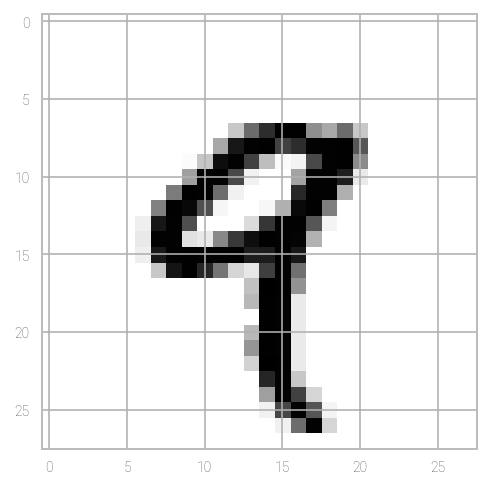

In [15]:
digit = train_images[4] # Select the fouth sample.
plt.imshow(digit, cmap=plt.cm.binary) # Show the sample.  cmap is the color map.  We will keep it black and white (binary)
plt.show()

In [16]:
# Import models and layers from tensorflow 
from tensorflow.keras import models
from tensorflow.keras import layers

In [17]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [19]:
train_images =  train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/train_images.max()

print(train_images.ndim)

test_images =  test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/test_images.max()

2


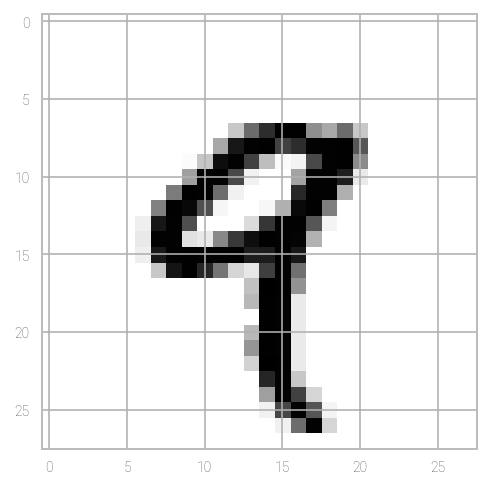

In [20]:
plt.imshow(train_images.reshape((60000,28,28))[4], cmap=plt.cm.binary)

In [21]:
print('train image shape:', train_images.shape)
print('number of dimensions:', train_images.ndim)
print('maximum value', train_images.max())
print('minimum value:', train_images.min())

train image shape: (60000, 784)
number of dimensions: 2
maximum value 1.0
minimum value: 0.0


In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [24]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 120) 
# Batch size is how many images to process at once. Epoch is how many times to repeat the analysis.  Each epoch performs 500 gradient updates (60,000/120 = 500)

Epoch 1/5
500/500 [==============================] - 1s 2ms/step - loss: 0.2629 - accuracy: 0.9254
Epoch 2/5
500/500 [==============================] - 1s 2ms/step - loss: 0.1075 - accuracy: 0.9685
Epoch 3/5
500/500 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9797
Epoch 4/5
500/500 [==============================] - 1s 2ms/step - loss: 0.0495 - accuracy: 0.9856
Epoch 5/5
500/500 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9895


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 885us/step - loss: 0.0638 - accuracy: 0.9797
test_acc: 0.9797000288963318


# Your Turn
####  Build 3 different models with activations 'relu', 'tanh', and 'sigmoid'.  The last activation must be 'softmax' since we have a multiclass problem

In [26]:
relu_model = models.Sequential()
relu_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
relu_model.add(layers.Dense(10, activation='softmax'))

tanh_model = models.Sequential()
tanh_model.add(layers.Dense(512, activation='tanh',input_shape=(28 * 28,)))
tanh_model.add(layers.Dense(10, activation='softmax'))


sigmoid_model = models.Sequential()
sigmoid_model.add(layers.Dense(512, activation='sigmoid',input_shape=(28 * 28,)))
sigmoid_model.add(layers.Dense(10, activation='softmax'))

#### Compile your model.  Use categorical_crossentropyy since this problem is a multiclassification problem. Metrics will be 'accuracy' and optimizer will be 'adam'.

In [27]:
relu_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

tanh_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

sigmoid_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

#### Fit the models with epochs = 5 and  batch_size = 150

In [28]:
relu_model.fit(train_images, train_labels, epochs = 5, batch_size = 150) 
tanh_model.fit(train_images, train_labels, epochs = 5, batch_size = 150) 
sigmoid_model.fit(train_images, train_labels, epochs = 5, batch_size = 150) 

Epoch 1/5
400/400 [==============================] - 1s 2ms/step - loss: 0.2816 - accuracy: 0.9205
Epoch 2/5
400/400 [==============================] - 1s 2ms/step - loss: 0.1153 - accuracy: 0.9664
Epoch 3/5
400/400 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9776
Epoch 4/5
400/400 [==============================] - 1s 2ms/step - loss: 0.0538 - accuracy: 0.9844
Epoch 5/5
400/400 [==============================] - 1s 2ms/step - loss: 0.0408 - accuracy: 0.9879
Epoch 1/5
400/400 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.9047
Epoch 2/5
400/400 [==============================] - 1s 2ms/step - loss: 0.1874 - accuracy: 0.9456
Epoch 3/5
400/400 [==============================] - 1s 2ms/step - loss: 0.1278 - accuracy: 0.9637
Epoch 4/5
400/400 [==============================] - 1s 2ms/step - loss: 0.0938 - accuracy: 0.9732
Epoch 5/5
400/400 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9793
Epoch 1/5


#### Test the accuracy of the model on the test images and test labels.

In [29]:
test_loss, test_acc = relu_model.evaluate(test_images, test_labels)
print('relu_test_acc:', test_acc)

test_loss, test_acc = tanh_model.evaluate(test_images, test_labels)
print('tanh_test_acc:', test_acc)

test_loss, test_acc = sigmoid_model.evaluate(test_images, test_labels)
print('sigmoid_model_test_acc:', test_acc)

313/313 [==============================] - 0s 880us/step - loss: 0.0692 - accuracy: 0.9782
relu_test_acc: 0.9782000184059143
313/313 [==============================] - 0s 919us/step - loss: 0.0914 - accuracy: 0.9730
tanh_test_acc: 0.9729999899864197
313/313 [==============================] - 0s 913us/step - loss: 0.1319 - accuracy: 0.9602
sigmoid_model_test_acc: 0.9602000117301941


#### which activation gave the highest accuracy?

The RELU activation gave the highest accuracy of 0.9782

### Using the acitvation that gave the highest accuracy build 3 different models with 3 hidden layers and varying units in each hidden layer.  The first and output layers are given to you.  Use the same 'relu' activation fuction on the input and hidden layers throughout so you can compare how adding nodes and hidden layers effect your model performance with the same activation function.
### By convention hidden layers are built in orders of 2^x.  For example: 2, 4, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, etc. Built three models where the nodes (units) grow, stay consistant, and decrease.

In [30]:
# First model have the nodes increase from 2
h1_model = models.Sequential()
h1_model.add(layers.Dense(2, activation='relu',input_shape=(28 * 28,)))
h1_model.add(layers.Dense(32, activation='relu',input_shape=(28 * 28,)))
h1_model.add(layers.Dense(256, activation='relu',input_shape=(28 * 28,)))
h1_model.add(layers.Dense(2048, activation='relu',input_shape=(28 * 28,)))
h1_model.add(layers.Dense(10, activation='softmax'))

# Second model have the nodes stay consistant at 512
h2_model = models.Sequential()
h2_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h2_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h2_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h2_model.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
h2_model.add(layers.Dense(10, activation='softmax'))

# Third model, have the nodes decrease from 2048
h3_model = models.Sequential()
h3_model.add(layers.Dense(2048, activation='relu',input_shape=(28 * 28,)))
h3_model.add(layers.Dense(256, activation='relu',input_shape=(28 * 28,)))
h3_model.add(layers.Dense(32, activation='relu',input_shape=(28 * 28,)))
h3_model.add(layers.Dense(2, activation='relu',input_shape=(28 * 28,)))
h3_model.add(layers.Dense(10, activation='softmax'))

#### Complie the three models

In [31]:
h1_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

h2_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

h3_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

#### Fit the models with epochs = 5 and  batch_size = 150

In [32]:
h1_model.fit(train_images, train_labels, epochs = 5, batch_size = 150) 
h2_model.fit(train_images, train_labels, epochs = 5, batch_size = 150) 
h3_model.fit(train_images, train_labels, epochs = 5, batch_size = 150) 

Epoch 1/5
400/400 [==============================] - 1s 4ms/step - loss: 1.2272 - accuracy: 0.5365
Epoch 2/5
400/400 [==============================] - 1s 3ms/step - loss: 0.9590 - accuracy: 0.6636
Epoch 3/5
400/400 [==============================] - 1s 3ms/step - loss: 0.9003 - accuracy: 0.6875
Epoch 4/5
400/400 [==============================] - 1s 3ms/step - loss: 0.8688 - accuracy: 0.7035
Epoch 5/5
400/400 [==============================] - 1s 3ms/step - loss: 0.8438 - accuracy: 0.7141
Epoch 1/5
400/400 [==============================] - 2s 5ms/step - loss: 0.2252 - accuracy: 0.9312
Epoch 2/5
400/400 [==============================] - 2s 5ms/step - loss: 0.0899 - accuracy: 0.9722
Epoch 3/5
400/400 [==============================] - 2s 5ms/step - loss: 0.0600 - accuracy: 0.9813
Epoch 4/5
400/400 [==============================] - 2s 5ms/step - loss: 0.0448 - accuracy: 0.9857
Epoch 5/5
400/400 [==============================] - 2s 5ms/step - loss: 0.0393 - accuracy: 0.9877
Epoch 1/5


#### Test the accuracy of the 3 models

In [33]:
test_loss, test_acc = h1_model.evaluate(test_images, test_labels)
print('h1_model_test_acc:', test_acc)

test_loss, test_acc = h2_model.evaluate(test_images, test_labels)
print('h2_model_test_acc:', test_acc)

test_loss, test_acc = h3_model.evaluate(test_images, test_labels)
print('h3_model_model_model_test_acc:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.8241 - accuracy: 0.7285
h1_model_test_acc: 0.7285000085830688
313/313 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9727
h2_model_test_acc: 0.9726999998092651
313/313 [==============================] - 0s 1ms/step - loss: 1.7265 - accuracy: 0.2817
h3_model_model_model_test_acc: 0.2816999852657318


#### Which model gave the highest accuracy?

The Second model which had the nodes stay consistent at 512 gave the greatest accuracy of 0.9727